In [3]:
import joblib

import numpy as np
import pandas as pd

from sklearn.svm import LinearSVC
from sklearn import cross_validation                                        
from sklearn import svm   
from sklearn import metrics
from sklearn import ensemble
from sklearn import cross_validation                                           
from sklearn import svm          
%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
# Set all parameters for the classifer
c.setClassifierParams(crop=True,bow_size=400, hessian=400,grayscale=True, verbose=False, resize=True, resize_width=600)

train_data = c.getTrainData(True)

creating BOW of size 400
done creating BOW
started extracting feautes
done extracting features


In [18]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    train_data[0], train_data[1], test_size=0.2)

weights = c.getClassWeights()

Counter({4: 143, 6: 112, 5: 106, 1: 104, 0: 103, 9: 101, 2: 98, 3: 98, 8: 96, 7: 95})


In [19]:
c.class2Name([0,1,2,3,4,5,6,7,8,9,])

['remote',
 'triggersmall',
 'nurofen',
 'glasses',
 'leatherman',
 'bulb',
 'pliers',
 'fitbit',
 'keys',
 'trigger']

## Linear SVM

In [20]:
clf = LinearSVC(class_weight='balanced')
clf.fit(X_train, y_train)

#Perform classification on train test split
y_pred = clf.predict(X_test)
print metrics.classification_report(y_test, y_pred)

#Perform 5 fold crossval                                            
scores = cross_validation.cross_val_score(clf, train_data[0], train_data[1], cv=5)  
print '5 Fold CrossValidation Score \n'
print scores
print 'Mean', scores.mean()

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        24
          1       1.00      1.00      1.00        21
          2       1.00      1.00      1.00        19
          3       1.00      1.00      1.00        20
          4       0.97      1.00      0.98        30
          5       1.00      1.00      1.00        26
          6       1.00      1.00      1.00        18
          7       1.00      1.00      1.00        19
          8       1.00      0.93      0.97        15
          9       1.00      1.00      1.00        20

avg / total       1.00      1.00      1.00       212

5 Fold CrossValidation Score 

[ 0.99537037  0.98122066  1.          0.99038462  0.98550725]
Mean 0.990496577882


In [9]:
c.class2Name([0,1,2,3,4,5,6,7,8,9,])

['remote',
 'triggersmall',
 'nurofen',
 'glasses',
 'leatherman',
 'bulb',
 'pliers',
 'fitbit',
 'keys',
 'trigger']

In [16]:
#With Final Test Data
#clf = LinearSVC(class_weight='balanced')
c.setClassifierParams(crop=False,bow_size=700, hessian=400,grayscale=True, verbose=False)

clf.fit(train_data[0], train_data[1])
report, df = c.predict(clf,True)

print report

started extracting feautes
done extracting features
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.89      1.00      0.94         8
          2       0.92      1.00      0.96        11
          3       0.91      1.00      0.95        10
          4       1.00      0.80      0.89        10
          5       1.00      0.20      0.33        10
          6       0.59      1.00      0.74        10
          7       0.78      0.70      0.74        10
          8       0.90      0.90      0.90        10
          9       0.91      1.00      0.95        10

avg / total       0.89      0.86      0.84        99



## Logistic

In [66]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(class_weight='balanced')

In [67]:
clf.fit(X_train, y_train)
#Perform classification on train test split
y_pred = clf.predict(X_test)
print metrics.classification_report(y_test, y_pred)

#Perform 5 fold crossval                                       
scores = cross_validation.cross_val_score(clf, train_data[0], train_data[1], cv=5)  
print '5 Fold CrossValidation Score \n'
print scores
print 'Mean', scores.mean()

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        21
          1       1.00      0.95      0.97        20
          2       1.00      1.00      1.00        17
          3       0.96      1.00      0.98        24
          4       0.55      1.00      0.71        26
          5       0.93      1.00      0.96        25
          6       1.00      0.89      0.94        19
          7       1.00      1.00      1.00        19
          8       0.00      0.00      0.00        21
          9       0.95      0.95      0.95        20

avg / total       0.83      0.88      0.85       212

5 Fold CrossValidation Score 

[ 0.89814815  0.90610329  0.89622642  0.88942308  0.90338164]
Mean 0.898656513813


### Random Forest

In [68]:
# Estimate the score on the entire dataset, with no missing valules
frst = ensemble.RandomForestClassifier(random_state=0, n_estimators=100, class_weight='balanced')

In [69]:
frst.fit(X_train, y_train)

#Perform classification on train test split
y_pred = frst.predict(X_test)

In [70]:
#Perform classification on train test split
y_pred = frst.predict(X_test)
print metrics.classification_report(y_test, y_pred)
#Perform 5 fold crossval
scores = cross_validation.cross_val_score(frst, train_data[0], train_data[1], cv=5)  
print '5 Fold CrossValidation Score \n'
print scores
print 'Mean', scores.mean()

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        21
          1       1.00      1.00      1.00        20
          2       1.00      1.00      1.00        17
          3       1.00      1.00      1.00        24
          4       1.00      1.00      1.00        26
          5       1.00      1.00      1.00        25
          6       1.00      1.00      1.00        19
          7       1.00      1.00      1.00        19
          8       1.00      1.00      1.00        21
          9       1.00      1.00      1.00        20

avg / total       1.00      1.00      1.00       212

5 Fold CrossValidation Score 

[ 0.99074074  1.          1.          0.98557692  0.98550725]
Mean 0.992364982039


In [71]:
X = np.array(X_train)

In [72]:
X.shape

(844, 400)

Feature ranking:
1. feature 347 (0.022730)
2. feature 8 (0.021740)
3. feature 61 (0.020772)
4. feature 2 (0.020334)
5. feature 336 (0.016782)
6. feature 386 (0.015636)
7. feature 339 (0.015471)
8. feature 39 (0.014675)
9. feature 327 (0.012123)
10. feature 308 (0.011645)
11. feature 220 (0.011075)
12. feature 77 (0.010873)
13. feature 134 (0.010024)
14. feature 159 (0.009896)
15. feature 236 (0.009840)
16. feature 1 (0.009806)
17. feature 249 (0.009757)
18. feature 172 (0.009548)
19. feature 18 (0.008914)
20. feature 380 (0.008782)
21. feature 124 (0.008687)
22. feature 267 (0.008476)
23. feature 66 (0.008329)
24. feature 381 (0.008073)
25. feature 23 (0.007984)
26. feature 149 (0.007642)
27. feature 296 (0.007620)
28. feature 393 (0.007495)
29. feature 123 (0.007468)
30. feature 240 (0.007238)
31. feature 260 (0.007093)
32. feature 111 (0.006900)
33. feature 353 (0.006799)
34. feature 131 (0.006429)
35. feature 13 (0.006329)
36. feature 10 (0.006206)
37. feature 280 (0.006166)
38. fea

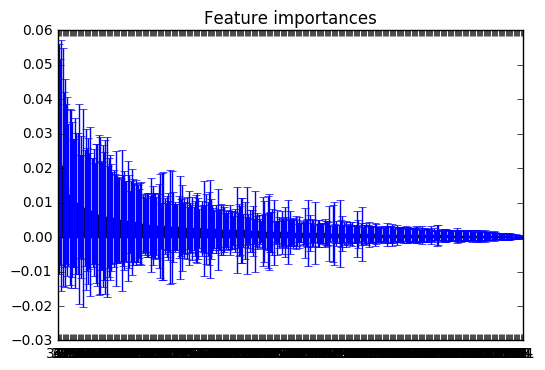

In [74]:
forest = frst
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### SVM RBF

In [77]:
clf = svm.NuSVC(kernel="rbf",class_weight='balanced',nu=0.6,degree=4)

In [78]:
clf.fit(X_train, y_train)

#Perform classification on train test split
y_pred = clf.predict(X_test)
print metrics.classification_report(y_test, y_pred)

#Perform 5 fold crossval                                           
scores = cross_validation.cross_val_score(clf, train_data[0], train_data[1], cv=5)  
print '5 Fold CrossValidation Score \n'
print scores
print 'Mean', scores.mean()

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        21
          1       1.00      0.95      0.97        20
          2       1.00      1.00      1.00        17
          3       0.95      0.88      0.91        24
          4       1.00      1.00      1.00        26
          5       1.00      1.00      1.00        25
          6       1.00      1.00      1.00        19
          7       1.00      1.00      1.00        19
          8       0.88      1.00      0.93        21
          9       0.95      0.95      0.95        20

avg / total       0.98      0.98      0.98       212

5 Fold CrossValidation Score 

[ 0.99074074  0.98591549  0.98584906  0.95192308  0.99033816]
Mean 0.980953306295


### Detect Outliers
Inliers are labeled 1, while outliers are labeled -1

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

In [36]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [28]:
y_pred_outliers = clf.predict(X_outliers)

NameError: name 'X_outliers' is not defined

In [29]:
from collections import Counter                                             
t = Counter(y_pred_test)   
tr = Counter(y_pred_train)  
print t
print tr

Counter({1.0: 291, -1.0: 31})
Counter({1.0: 675, -1.0: 75})


In [30]:
print float(t[1]) / sum(t.values())*100
print float(tr[1]) / sum(tr.values())*100

90.3726708075
90.0


In [31]:
test_d = c.getTestData()

In [32]:
y_pred_test = clf.predict(test_d[0])

In [33]:
t = Counter(y_pred_test)  
print float(t[1]) / sum(t.values())*100


72.0


In [38]:
outlier = c.getOutlierData()
o = clf.predict(outlier)
print o

started extracting feautes
done extracting features
[-1.  1.  1.  1.  1.]


In [40]:
o = Counter(o)

In [41]:
print float(o[-1]) / sum(o.values())*100

20.0


In [47]:
X_outliers = c.getOutlierData()

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size



started extracting feautes
done extracting features
